In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [14]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c')
c_qftadder = QuantumCircuit(q, c)

#Test
c_qftadder.x(q[0])


#QFT
c_qftadder.h(q[3])
c_qftadder.cp(np.pi / 2, q[4], q[3])
c_qftadder.cp(np.pi / 4, q[5], q[3])
c_qftadder.h(q[4])
c_qftadder.cp(np.pi / 2, q[5], q[4])
c_qftadder.h(q[5])
c_qftadder.swap(q[3],q[5])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

#CZ

c_qftadder.cp(np.pi, q[0], q[5])
c_qftadder.cp(np.pi / 2, q[1], q[5])
c_qftadder.cp(np.pi / 4, q[2], q[5])
c_qftadder.cp(np.pi, q[1], q[4])
c_qftadder.cp(np.pi / 2, q[2], q[4])
c_qftadder.cp(np.pi, q[2], q[3])

c_qftadder.barrier(q[0],q[1],q[2],q[3],q[4],q[5])

# c_qftadder.barrier(q[3],q[4],q[5])
# c_qftadder.h(q[3])
# c_qftadder.h(q[4])
# c_qftadder.h(q[5])
# c_qftadder.barrier(q[3],q[4],q[5])

#IQFT
# c_qftadder.h(q[3])
# c_qftadder.measure(q[3], c[0])


# c_qftadder.p(np.pi/2, q[4]).c_if(c, 1)
# c_qftadder.h(q[4])
# c_qftadder.measure(q[4], c[1])

# c_qftadder.p(np.pi/4, q[5]).c_if(c, 1)
# c_qftadder.p(np.pi/2, q[5]).c_if(c, 2)
# c_qftadder.p(np.pi / 2 + np.pi / 4, q[5]).c_if(c, 3)
# c_qftadder.h(q[5])

# c_qftadder.measure(q[5], c[2])

c_qftadder.swap(q[3],q[5])
c_qftadder.h(q[5])
c_qftadder.cp(np.pi / 2, q[5], q[4])
c_qftadder.h(q[4])
c_qftadder.cp(np.pi / 4, q[5], q[3])
c_qftadder.cp(np.pi / 2, q[4], q[3])
c_qftadder.h(q[3])

c_qftadder.measure(q[3], c[0])
c_qftadder.measure(q[4], c[1])
c_qftadder.measure(q[5], c[2])

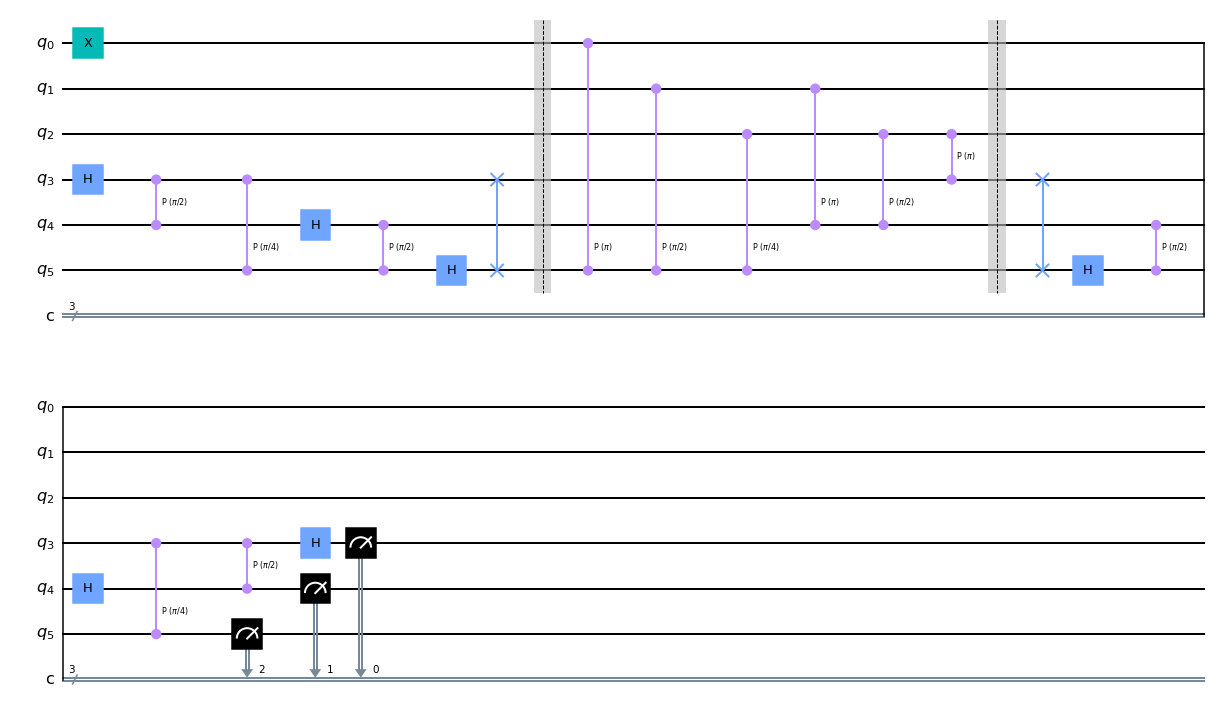

In [15]:
%matplotlib inline
c_qftadder.draw(output='mpl')

In [18]:
provider = IBMQ.get_provider(hub='ibm-q-skku', group='korea-university', project='ku-graduate')
backend = provider.get_backend('ibmq_jakarta')


Total count for 00 and 11 are: {'000': 631, '001': 758, '010': 705, '011': 278, '100': 386, '101': 292, '110': 631, '111': 319}


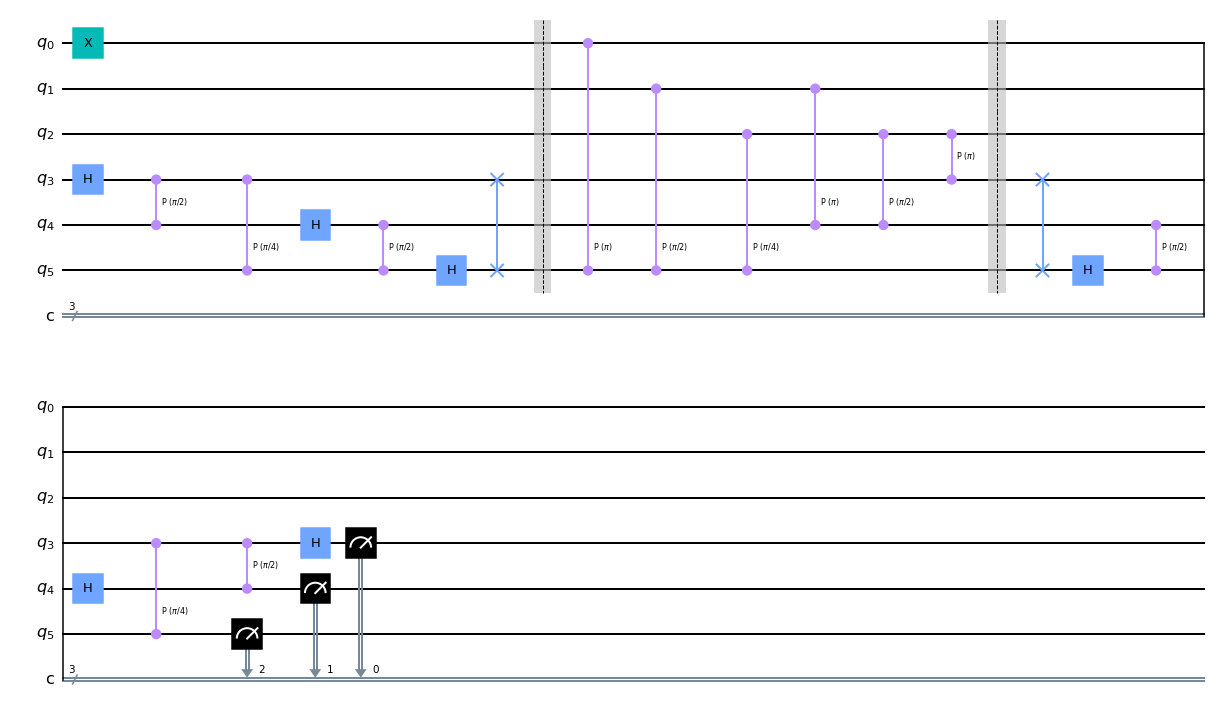

In [19]:
#job = execute(c_qftadder, backend, shots=100000)
job = execute(c_qftadder, backend)
result = job.result()
#counts = result.get_counts(c_qftadder)
counts = result.get_counts(c_qftadder)
print("\nTotal count for 00 and 11 are:",counts)
#_qftadder.draw()
c_qftadder.draw()